# Bank Personal_Loan

This case is about Thera Bank which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

# Importing Libraries  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# Loading Dataset 

In [2]:
df = pd.read_csv('../../Sapalogy Project/Nikhil pro/Bank_Personal_Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### About the data:
The data set includes **5000** observations with **14** variables divided into **4** different measurement categories. 


-The **binary** category has five variables, including the target variable personal loan, also securities account, CD account,  online banking and credit card.

-The **interval** category contains five variables: age, experience, income, CC avg and mortgage. 

-The **ordinal** category includes the variables family and education. 

-The last category is **nominal** with ID and Zip code. 


### Some information about the Dataset

In [3]:
print("Shape of Data:",df.shape)
r, c = df.shape
print("Number of Rows:",r)
print("Number of Columns:",c)

Shape of Data: (5000, 14)
Number of Rows: 5000
Number of Columns: 14


Number of Rows in Dataset are **5000** & Number of Columns in Dataset are **14**

In [4]:
print("Names of Column:")
print(df.columns)

Names of Column:
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [5]:
print("Number of Null Values:",df.isnull().sum())

Number of Null Values: ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [6]:
print("Number of Duplicate Values: ",df.duplicated().sum())

Number of Duplicate Values:  0


In [7]:
print("Information about the Dataset")
df.info()

Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


So here we can see that, dataset donot have any **Duplicate Values** which is good thing. If we get duplicate values we have to remove those. After this we check for the **null values**. Our data not have any null value so we are ready to go further.

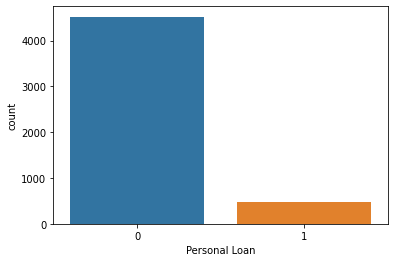

In [8]:
plt.figure()
sns.countplot(x = 'Personal Loan',data = df )
plt.show()

### Drop coulmns operation
-**ID** coulumn in our database have a unique number for every client.

-**ZIP Code** coulumn in our database have a ZIP Code for the city of the clients

So there is no relation between ID columns or ZIP Code coulumn and any ather variable. It will be useful for use when drop them to prevent occurrence of misleading.

In [9]:
data = df.drop(columns = ['ZIP Code', 'ID'])
data.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [10]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Observations:**

We can see in the describe cell above the **min** value of **Experience** columns is (-3) but we knowe the Experience values must be possitive we will change any negative Experience value by the mean

In [11]:
data['Experience'][data['Experience'] < 0] = data['Experience'].mean()
data.describe()

C:\Users\Atish\AppData\Local\Temp\ipykernel_5876\1733556670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Experience'][data['Experience'] < 0] = data['Experience'].mean()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.328688,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253009,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.104600,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Observations:**
We will convert the CCAvg from monthely average to annual average like income coulmn.

In [12]:
data['ann_CV'] = data['CCAvg'] * 12
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ann_CV
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,19.2
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,18.0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,12.0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,32.4
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0,22.8
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0,4.8
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0,3.6
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0,6.0


In [13]:
data.drop('CCAvg', axis = 1, inplace = True)
data

,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ann_CV
0,25,1.0,49,4,1,0,0,1,0,0,0,19.2
1,45,19.0,34,3,1,0,0,1,0,0,0,18.0
2,39,15.0,11,1,1,0,0,0,0,0,0,12.0
3,35,9.0,100,1,2,0,0,0,0,0,0,32.4
4,35,8.0,45,4,2,0,0,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,3,0,0,0,0,1,0,22.8
4996,30,4.0,15,4,1,85,0,0,0,1,0,4.8
4997,63,39.0,24,2,3,0,0,0,0,0,0,3.6
4998,65,40.0,49,3,2,0,0,0,0,1,0,6.0


<function matplotlib.pyplot.show(close=None, block=None)>

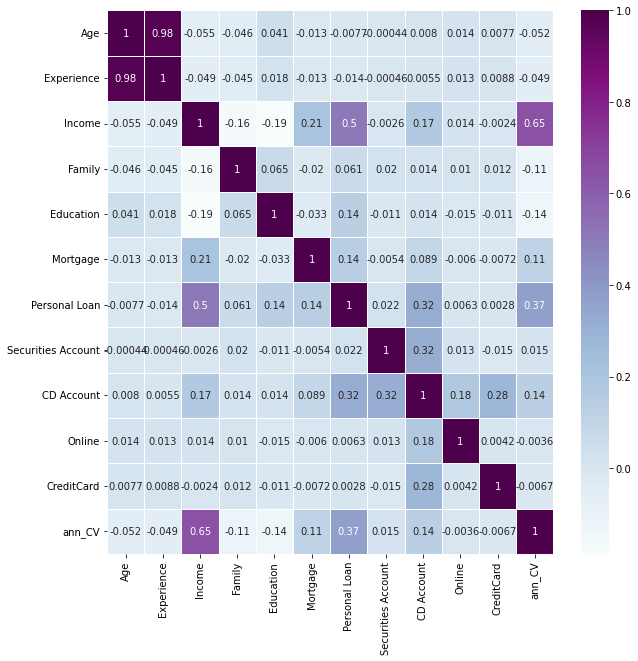

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

## Observation
- 'Age' and 'Experience' are correlated with each other.

- 'Income' and ‘ann_CCAvg' correlated with each other.

- 'CD Account' has a correlation with 'Credit Card', 'Securities Account', 'Online', ‘ann_CCAvg' and 'Income'.

- 'Personal Loan' has correlation with 'Income’, ann_'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

- 'Mortgage' has moderate correlation with 'Income'

- 'Income' influences ‘ann_CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'. 

<AxesSubplot:xlabel='Age', ylabel='Income'>

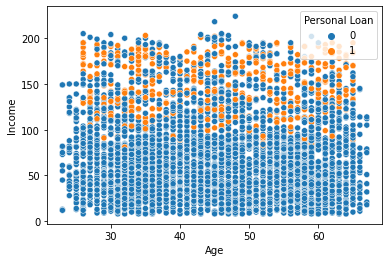

In [15]:
sns.scatterplot(x = 'Age', y = 'Income', data = data, hue = 'Personal Loan')

**Clients with income more than 100k are more likely to get loan**

<AxesSubplot:xlabel='Age', ylabel='ann_CV'>

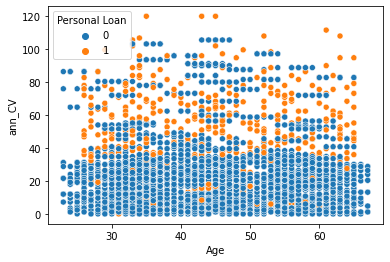

In [16]:
sns.scatterplot(x = 'Age', y = 'ann_CV', data = data, hue = 'Personal Loan')

**Clients with annual CV average more than 30 are more likely to get loan**

<AxesSubplot:xlabel='Experience', ylabel='count'>

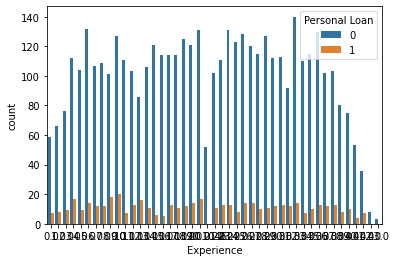

In [17]:
sns.countplot(x='Experience', hue = 'Personal Loan', data = data)

<AxesSubplot:xlabel='Family', ylabel='count'>

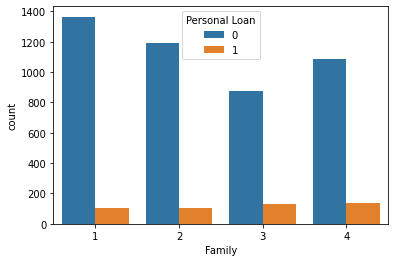

In [18]:
sns.countplot(x='Family', hue = 'Personal Loan', data = data)

**We can see in previous two graph the Family and Experience has a low effect in the personal loan attribute**

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

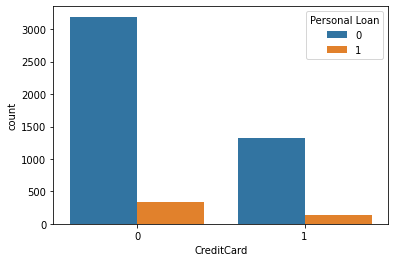

In [19]:
sns.countplot(x='CreditCard', hue = 'Personal Loan', data = data)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

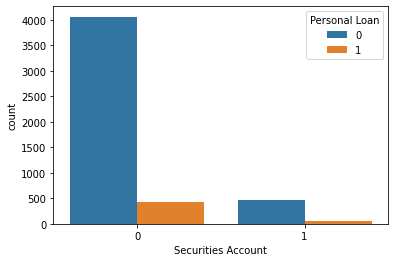

In [20]:
sns.countplot(x='Securities Account', hue = 'Personal Loan', data = data)

<AxesSubplot:xlabel='CD Account', ylabel='count'>

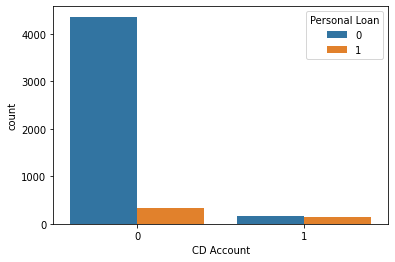

In [21]:
sns.countplot(x='CD Account', hue = 'Personal Loan', data = data)

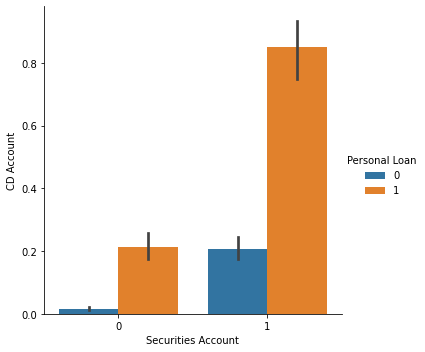

In [22]:
sns.catplot(x='Securities Account', y = 'CD Account', data = data, kind = 'bar', hue = 'Personal Loan' )

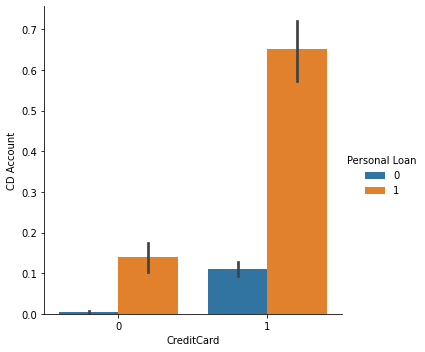

In [23]:
sns.catplot(x='CreditCard', y = 'CD Account', data = data, kind = 'bar', hue = 'Personal Loan' )

**After investigating previous plots.We will work on the all data after drop the 'ID' and 'ZIP Code' coulmns because we find all coulmns are affect on each other**

## Spliting the data
**Training Set and Testing Set in the ratio of 70:30**

In [24]:
from sklearn.model_selection import train_test_split
X = data.drop('Personal Loan', axis = 1).values
y = data['Personal Loan'].values.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Personal Loan'], axis=1),
    data['Personal Loan'],
    test_size=0.3,
    random_state=0)

# X_train.shape, X_test.shape
print("Training Dataset Shape:",X_train.shape)
r, c = X_train.shape
print("Rows= ",r )
print("Columns= ",c)
print("Testing Dataset Shape:",X_test.shape)
r, c = X_test.shape
print("Rows= ",r )
print("Columns= ",c)

Training Dataset Shape: (3500, 11)
Rows=  3500
Columns=  11
Testing Dataset Shape: (1500, 11)
Rows=  1500
Columns=  11


### Determine Mutual Information

Calculate the mutual information between the variables and the target the smaller the value of the mi, the less information we can infer from the feature about the target.

In [25]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train)
mi

array([0.        , 0.        , 0.14364732, 0.00622923, 0.00905131,
       0.01452192, 0.01055069, 0.03203048, 0.        , 0.00396957,
       0.08871627])

Let's capture the above array in a pandas series add the variable names in the index sort the features based on their mutual information value and make a var plot

Text(0, 0.5, 'Mutual Information')

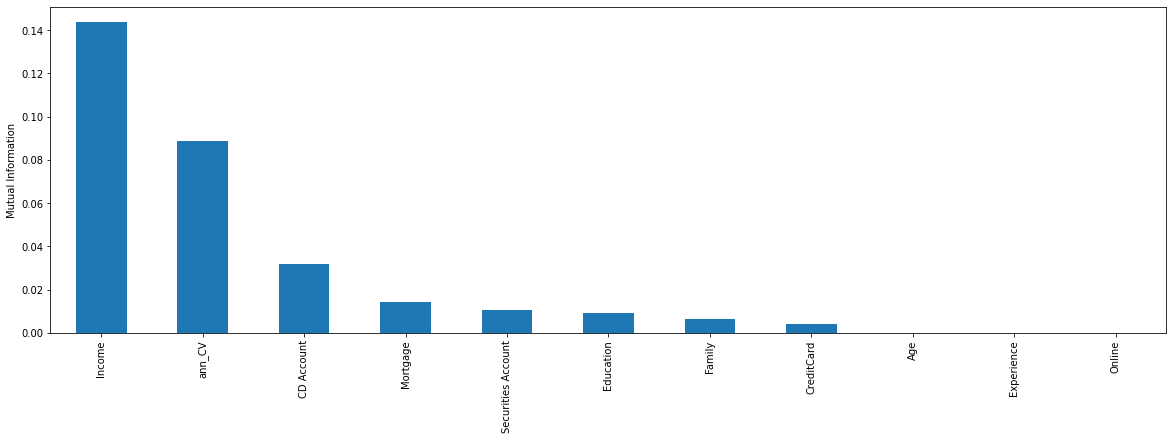

In [26]:
# to select the features
from sklearn.feature_selection import SelectKBest
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero mutual information(mi) values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

Select top k features, where k is an arbitrary number of features

### Select top k features based on Mutual Information 
Here we will select the **top 5 features** based on their mutual information value

In [27]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=5).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['Income', 'Education', 'Mortgage', 'CD Account', 'ann_CV'], dtype='object')

In [28]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [29]:
# X_train.shape,X_test.shape
r, c = X_train.shape
print("Train Dataset:")
print("Rows=",r)
print("Column=",c)
r, c = X_test.shape
print("Test Dataset:")
print("Rows=",r)
print("Column=",c)

Train Dataset:
Rows= 3500
Column= 5
Test Dataset:
Rows= 1500
Column= 5


Now our Training Dataset is of the size (3500,5) i.e. Rows = 3500, Columns = 5. And Testing Dataset is of the size (1500,5) i.e. Rows = 1500, Columns = 5.

## SMOTE

Here we can see the data is **Unbalance**. The lable which contain '0' is greater than the label containg '1'. 

So here we need to **Balance** the dataset in this way that our model get train in similar ways on both the labels. 

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 352
Before OverSampling, counts of label '0': 3148 



In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [32]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

After OverSampling, the shape of train_X: (6296, 5)
After OverSampling, the shape of train_y: (6296,) 

After OverSampling, counts of label '1': 3148
After OverSampling, counts of label '0': 3148


Now, our dataset is been **Balance**, so we can train our privious model on this dataset.

In [33]:
#checking the length of the Training data before balancing
print(len(X_train))

3500


In [34]:
#checking the length of the Test data after balancing
print(len(X_train_smote))

6296


# Algorithm
**On our work we will use five kind of algorithms to the find algorithm with highest f1_score**

- LogisticRegression
- SVM
- MLP
- DecisionTreeClassifier
- RandomForestClassifier

## 1. Logestic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
clas = LogisticRegression(random_state = 0)
clas.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

#import classification report
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1372
           1       0.76      0.61      0.68       128

    accuracy                           0.95      1500
   macro avg       0.86      0.80      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [37]:
y_pred1 = clas.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
acc_org = accuracy_score(y_test, y_pred1)

[[1348   24]
 [  50   78]]


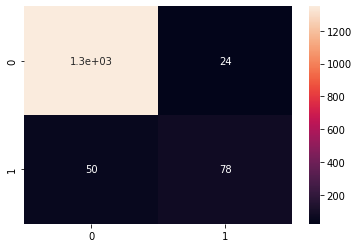

accuracy= 95.06666666666666


In [38]:
sns.heatmap(cm,annot=True)
plt.show()
print("accuracy=", acc_org*100 )

In [39]:
from sklearn.metrics import accuracy_score
LR_acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy score for Logistic Regression Model : {:.2f} %".format(LR_acc1*100))

Accuracy score for Logistic Regression Model : 95.07 %


ROC curve

In [40]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = clas.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds)


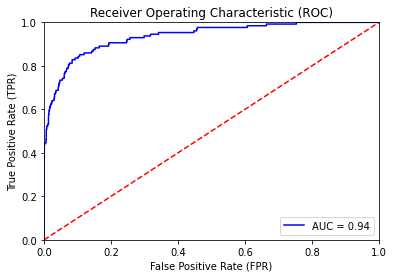

In [41]:
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()


## By using SMOTE

In [42]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier1 = LR_classifier.fit(X_train_smote, y_train_smote)

In [43]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train_smote, y_train_smote)

predictions = lr.predict(X_test)

#import classification report
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1372
           1       0.45      0.87      0.59       128

    accuracy                           0.90      1500
   macro avg       0.72      0.88      0.76      1500
weighted avg       0.94      0.90      0.91      1500



In [44]:
y_pred = LR_classifier1.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [45]:
y_pred = LR_classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1234  138]
 [  17  111]]


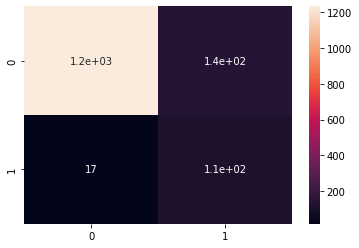

In [46]:
sns.heatmap(cm,annot=True)
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
LR_acc2 = accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression Model with SMOTE: {:.2f} %".format(LR_acc2*100))

Accuracy score for Logistic Regression Model with SMOTE: 89.67 %


### Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = [{ 'penalty': ['l1','l2'], 'C': np.arange(1,10) }]

grid_search = GridSearchCV(estimator = LR_classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                          error_score='raise')

In [ ]:
grid_search.fit(X_train_smote, y_train_smote)
LR_acc3 = grid_search.best_score_
best_parameters = grid_search.best_params_

In [49]:
print("Best Accuracy: {:.2f} %".format(LR_acc3*100))
print("Best Parameters:", best_parameters)

ERROR! Session/line number was not unique in database. History logging moved to new session 348


NameError: name 'LR_acc3' is not defined

In [ ]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = LR_classifier.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()